<img src="../images/MalariaGEN.png" alt="MalariaGEN logo" width="375px" align="left">

**We would like to thank all MalariaGEN Plasmodium falciparum Community Project partners for their contribution. If you use this resource please remember to also site the following studies:**
[Pf6 partner studies](http://ngs.sanger.ac.uk/production/malaria/pfcommunityproject/Pf6/Pf_6_partner_studies.pdf) and [GenRe partner studies](http://ngs.sanger.ac.uk/production/malaria/Resource/29/20200705-GenRe-07-PartnerStudyInformation-0.39.pdf).

# Introduction to Pf6+

## Setup

### Running on Colab 

In [ ]:
# installing dependencies 
!pip uninstall -q -y shapely #if using locally, you need to uninstall other shapely versions first

!pip uninstall -q -y imgaug # uninstalling other 'imgaug' versions due to colab incompatibility
!pip install imgaug==0.2.5

!pip install -q shapely --no-binary shapely \
                                    cartopy \
                                    geopandas \


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Copy the data analysis code onto colab


In [ ]:
!cp -r drive/MyDrive/data_analysis .

### Running locally 



There are some steps you need to follow before opening the notebooks to run them locally. If you haven't already, please follow these [instructions](https://gitlab.com/malariagen/gsp/pf6plus/-/tree/add_jupyter_notebooks/notebooks#running-locally).


### Import the python scripts to run the analysis

In [ ]:
import bokeh.io 
bokeh.io.output_notebook()

In [ ]:
from data_analysis.map_samples import *
from data_analysis.plot_temporal_samples import *

## Pf6+

The Pf6+ data resource builds on the efforts of the Pf6 project (https://wellcomeopenresearch.org/articles/6-42/v1) and the GenRe project (https://www.malariagen.net/resource/29); integrating  5,970 WGS samples together with 7,626 Amplicon Sequencing samples. 

**Pf6+ is a highly heterogeneous data resource so care needs to be taken when interpreting the aggregated analysis contained in these notebooks and any further work you may do.**

### Import Data

In [ ]:
import pandas as pd

In [ ]:
pf6plus_metadata = 'https://pf6plus.cog.sanger.ac.uk/pf6plus_metadata.tsv'
pf6plus = pd.read_csv(pf6plus_metadata, sep='\t', index_col=0, low_memory=False)

Here we filter out the samples which have IncludeInAnalysis set to True. This will filter out only the high-quality samples. (This includes a combination of QC samples for WGS and samples “included” in the GenRe analysis for AmpSeq)

In [ ]:
pf6plus=pf6plus.loc[pf6plus.IncludeInAnalysis==True]

### Working with the Pf6+ Data

You can filter out only the Pf6 samples by filtering for the WGS samples:

In [ ]:
pf6plus.loc[pf6plus['Process'] == 'WGS']

The plots below show the spread of data geographically for both the Pf6 and GenRe samples, and then how combining them can provide not only more samples, but a greater global coverage. Click on the icons to find out more about the data collected at each site. 

In [ ]:
map_samples(pf6plus, 'Pf6')

In [ ]:
map_samples(pf6plus, 'GenRe')

In [ ]:
map_samples(pf6plus, 'Pf6+')

## Samples on Pf6+


### Across locations (between and within countries)

In [1]:
import bokeh.io 
bokeh.io.output_notebook()
from data_analysis.plotting import * 
import pandas as pd 

pf6plus_metadata = 'https://pf6plus.cog.sanger.ac.uk/pf6plus_metadata.tsv'
pf6plus = pd.read_csv(pf6plus_metadata, sep='\t', index_col=0, low_memory=False)
pf6plus=pf6plus.loc[pf6plus.IncludeInAnalysis==True]

plot_samples_per_country_and_study(pf6plus)

Loading BokehJS ...

AttributeError: Unknown property ylabel

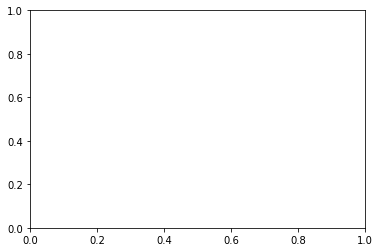

In [2]:
samples_per_country_and_study = pf6plus.groupby(['Country', 'Study']).size().unstack().fillna(0)
samples_per_country_and_study.plot.bar(stacked=True, ylabel='# of Samples', title='Studies contributing to Pf6+ across countries', legend=False)
plt.show()

### Across years 

In [ ]:
temporal_samples(pf6plus, 'Pf6+')

In [ ]:
grouped_by_year_and_study = pf6plus.groupby(['Year', 'Study']).size().unstack().fillna(0)
grouped_by_year_and_study.plot.bar(stacked=True, ylabel='# of Samples', title='Studies contributing to Pf6+ across years', legend=False)
plt.show()

## Samples contributed to Pf6+ 

In [ ]:
#studies contributing WGS samples
wgs = pf6plus.loc[pf6plus['Process'] == 'WGS'].groupby(['Country', 'Study']).size().to_frame('Number of WGS samples')
#studies contributing AmpSeq samples (any technology)
ampseq = pf6plus.loc[pf6plus['Process'] != 'WGS'].groupby(['Country', 'Study']).size().to_frame('Number of AmpSeq samples')

#all studies in Pf6+
pd.set_option('display.max_rows', 100)
all_samples = pd.concat([wgs,ampseq])
all_samples.fillna('-')

### Example of other metadata

In [ ]:
list(pf6plus.columns)

## Partners & Funders contribution

We would like to thank all **MalariaGEN Plasmodium falciparum Community Project partners** for contributing to this resource. 

Specifically, to the: 
- Pf6 partner studies (http://ngs.sanger.ac.uk/production/malaria/pfcommunityproject/Pf6/Pf_6_partner_studies.pdf). 
- GenRe partner studies (http://ngs.sanger.ac.uk/production/malaria/Resource/29/20200705-GenRe-07-PartnerStudyInformation-0.39.pdf).